In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
np.sum(df.isnull())

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
cabinNullPercentage = (df[df['Cabin'].isnull()].shape[0] / df.shape[0])
print(cabinNullPercentage*100)

0.7710437710437711


**Do we need to drop the Cabin column entirely from the analysis?**

Depends on what we are going to do with this dataframe.
It probably would not be wise to use this column because about 77 percent of this column is null. As a result, even if we try to fill this null data, it would introduce a lot of noise and uncertainty into the dataset, reducing the reliability of any insights or model built from it.

Therefore, in most cases, it’s better to drop the Cabin column unless we have a specific reason to extract limited information from it (for example, whether a passenger had a cabin or not).

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
np.sum(df['Embarked'].isnull())

np.int64(0)

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df[df['Survived']==1].shape[0]/df['Survived'].shape[0]*100

38.38383838383838

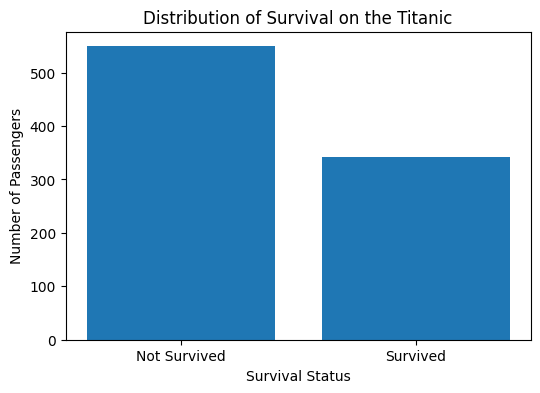

In [ ]:
survival_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(survival_counts.index, survival_counts.values, tick_label=['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Survival on the Titanic')
plt.xticks([0, 1])
plt.show()

In [ ]:
class_counts= df['Pclass'].value_counts()

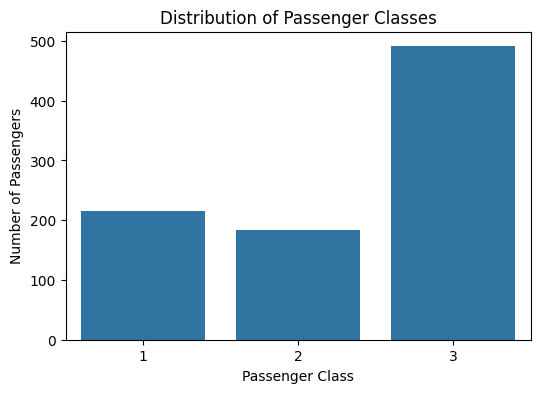

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

In [ ]:
most_common_class = df['Pclass'].value_counts().idxmax()
print(most_common_class)

3


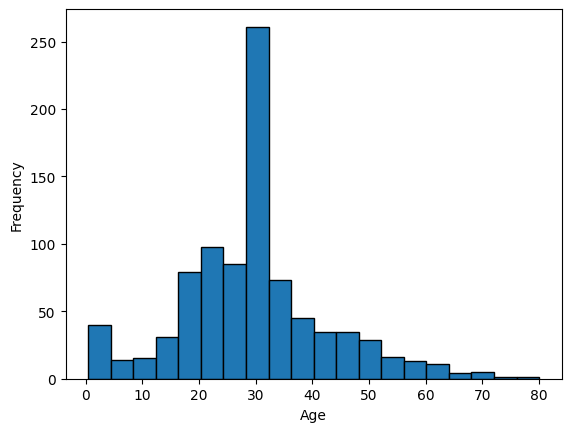

In [ ]:
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

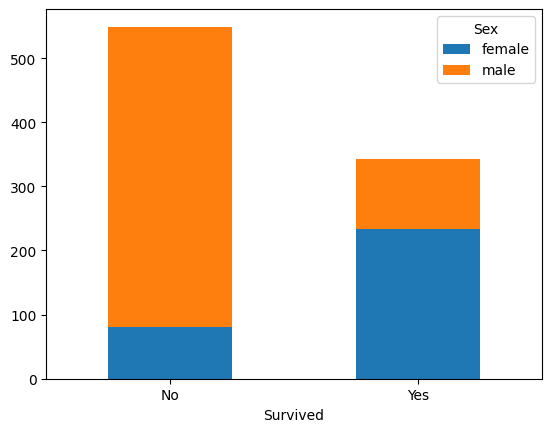

In [ ]:
pd.crosstab( df['Survived'],df['Sex']).plot(kind='bar', stacked=True)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.xlabel('Survived')
plt.show()

In [ ]:
print("Based on the chart, it is evident that females have higher survival rate")

Based on the chart, it is evident that females have higher survival rate


In [ ]:
df1=pd.crosstab(df['Pclass'],df['Survived'])
print(df1)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [ ]:
pclass_survival_rate = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Passenger Class:")
print(pclass_survival_rate)


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


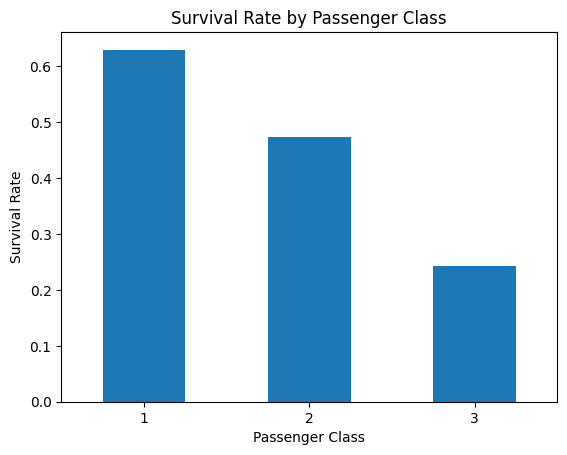

In [ ]:
pclass_survival_rate.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

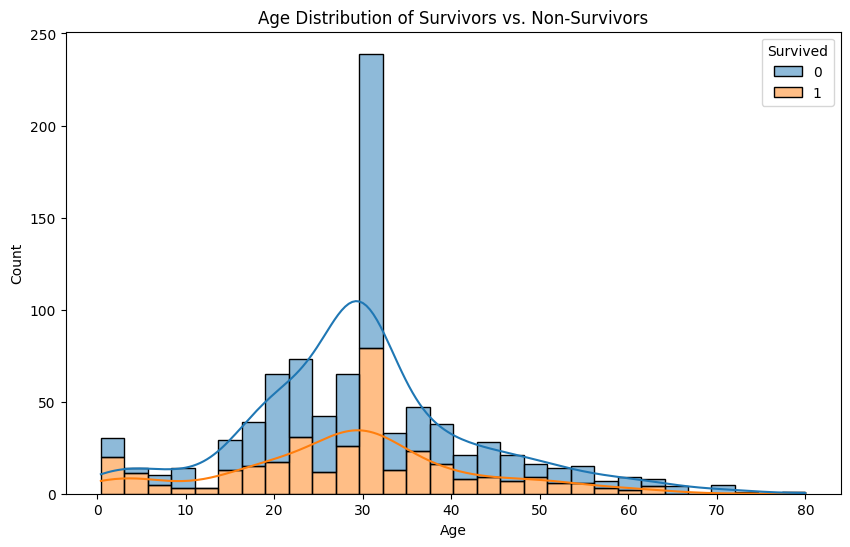

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
embarked_survival_rate = df.groupby('Embarked')['Survived'].mean()
print("Survival Rate by Embarkation Port:")
print(embarked_survival_rate)

Survival Rate by Embarkation Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


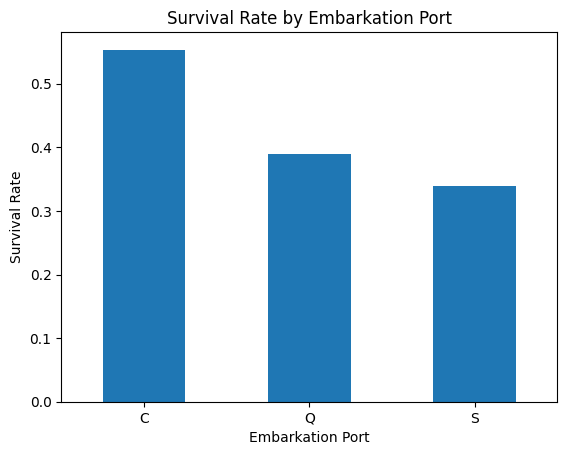

In [ ]:
embarked_survival_rate.plot(kind='bar')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

From the exploratory data analysis, the key factors that influenced survival on the Titanic were Sex, Passenger Class (Pclass), and to a lesser extent, Age. Women had a much higher survival rate compared to men. Passengers in first and second class had significantly better chances of survival than those in third class. The analysis also showed that children, as well as younger individuals, seemed to have a higher probability of surviving. These three factors are the most important predictors of survival in this dataset.